# ATOFFL League Brief (For Fun) 

*Note: This notebook is not meant to demonstrate a skill, package, or full analysis. Any and all graphics/visuals were genreated for a powerpoint used at our fantasy football leagues 2018 draft. 

### Import Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
%matplotlib inline
sns.set()

### Import Data

In [12]:
#Reading in a datafile for each year
data_2014 = pd.read_excel('C:/Users/mikes/Documents/Python Scripts/FF_owners/ATOAFFL_STATS_2014_2017.xlsx', sheetname='2014')
data_2014.name = '2014'
data_2015 = pd.read_excel('C:/Users/mikes/Documents/Python Scripts/FF_owners/ATOAFFL_STATS_2014_2017.xlsx', sheetname='2015')
data_2015.name = '2015'
data_2016 = pd.read_excel('C:/Users/mikes/Documents/Python Scripts/FF_owners/ATOAFFL_STATS_2014_2017.xlsx', sheetname='2016')
data_2016.name = '2016'
data_2017 = pd.read_excel('C:/Users/mikes/Documents/Python Scripts/FF_owners/ATOAFFL_STATS_2014_2017.xlsx', sheetname='2017')
data_2017.name = '2017'

### Clean dataframes

Below I create a few KPI's for our league, mainly establishing an average unique to each year.

In [13]:
for df in [data_2014, data_2015, data_2016, data_2017]:
    #Calculate Regular Season Win PCT
    df.insert(1, 'Win_Pct', df['WINS'] / 13)
        
    pts_for_avg = df['POINTS FOR'].mean()
    pts_against_avg = df['POINTS AGAINST'].mean()
    df['Pts_For_Above_Avg'] = df['POINTS FOR'] - pts_for_avg
    df['Pts_Against_Below_Avg'] = pts_against_avg - df['POINTS AGAINST'] 
    df['Year'] = df.name

### Combining Dataframes

In [14]:
data = data_2014.append([data_2015, data_2016, data_2017])

###  Viewing my personal stats for each season

In [15]:
data[data.MANAGER == 'MIKE']

,MANAGER,Win_Pct,WINS,LOSSES,POINTS FOR,POINTS AGAINST,PF/G,PA/G,DIFF,REGULAR SEASON FINISH,RESULT,Pts_For_Above_Avg,Pts_Against_Below_Avg,Year
2,MIKE,0.769231,10,3,1815.3,1448.5,139.638462,111.423077,28.215385,1,3rd Place,331.283333,35.508333,2014
2,MIKE,0.846154,11,2,1724.0,1503.6,132.615385,115.661538,16.953846,1,1st Place,199.641667,20.766667,2015
2,MIKE,0.538462,7,6,1406.0,1431.7,108.153846,110.130769,-1.976923,6,4th Place,-106.575000,80.875000,2016
2,MIKE,0.923077,12,1,1520.0,1258.6,116.923077,96.815385,20.107692,1,1st Place,62.775000,198.625000,2017


### Plotting Each Team's Average "Points For" vs. League Average

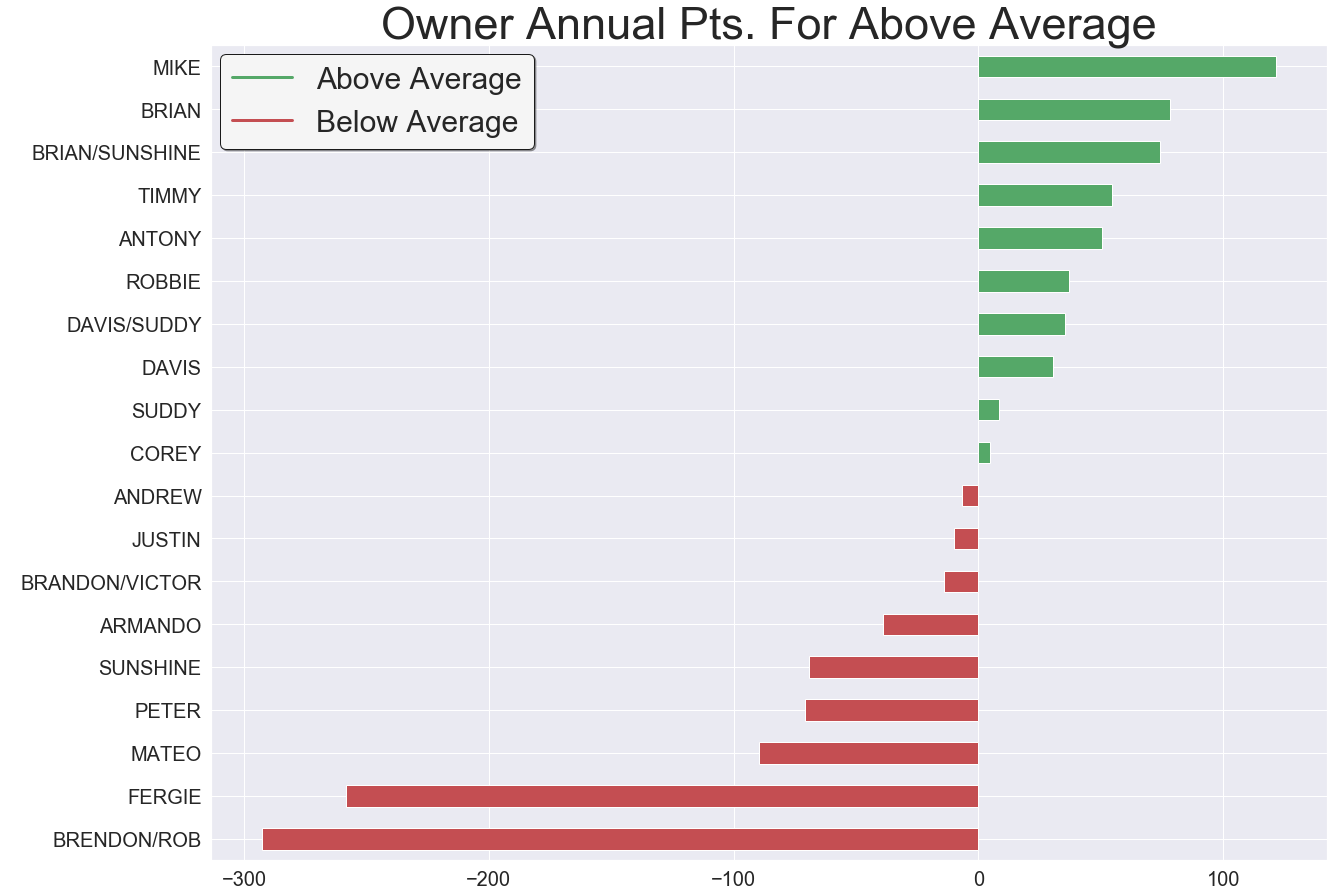

In [38]:
#Beginning to plot
fig, ax = plt.subplots(figsize=(20, 15))
result = pd.DataFrame(data.groupby('MANAGER')['Pts_For_Above_Avg'].mean()).sort_values('Pts_For_Above_Avg')

#Plot values less than 0 as red, values greater than 0 as green
mask = (result >=0)
colors = np.array(['r']*(result.shape[0]))
colors[mask.values.flatten()] = 'g'

#Generating the bar plot
result['Pts_For_Above_Avg'].plot(kind='barh', color=colors.reshape(-1, ), ax=ax)

#Changing the ylabel and tick parameters
ax.tick_params(labelsize=20)
plt.ylabel(' ', size=10)

#Custom lines for use in the legend
custom_lines = [Line2D([0], [0], color='g', lw=3),
                Line2D([0], [0], color='r', lw=3)]

#Specifying the custom legend
ax.legend(custom_lines, ['Above Average', 'Below Average'], 
          loc=2, prop={'size':30}, fancybox=True, frameon=True,
          shadow=True, facecolor='whitesmoke', edgecolor='k',
          framealpha=1, borderaxespad=.3)

#Setting the title and saving the plot locally
ax.set_title('Owner Annual Pts. For Above Average', size=45)
fig.savefig('Owner_Pts._For_Above_Average.png');

On average, I score the most points above the league season average. Suprisingly, teams containing commish round out the 2 and 3 spots. Conclusion, Mateo, Peter and Sunshine are bad at FF.

# Historic "Points For" Seasons (Best and Worst)

### 3 Best Points_For_Above_Avg Seasons

In [39]:
data.sort_values('Pts_For_Above_Avg', ascending=False)[:3].drop(['DIFF', 'PA/G', 'PF/G', 'WINS', 'LOSSES', 'Year'], axis=1)

,MANAGER,Win_Pct,POINTS FOR,POINTS AGAINST,REGULAR SEASON FINISH,RESULT,Pts_For_Above_Avg,Pts_Against_Below_Avg
2,MIKE,0.769231,1815.3,1448.5,1,3rd Place,331.283333,35.508333
9,PETER,0.846154,1755.7,1390.4,1,3rd Place,243.125000,122.175000
2,MIKE,0.846154,1724.0,1503.6,1,1st Place,199.641667,20.766667


I have had the best and third best scoring seasons above average in league history, with Peter having the second best. Interestingly enough, the top two seasons ended in 3rd place.

### 3 Worst Points_For_Above_Avg Seasons

In [8]:
data.sort_values('Pts_For_Above_Avg')[:3].drop(['DIFF', 'PA/G', 'PF/G', 'WINS', 'LOSSES', 'Year'], axis=1)

,MANAGER,Win_Pct,POINTS FOR,POINTS AGAINST,REGULAR SEASON FINISH,RESULT,Pts_For_Above_Avg,Pts_Against_Below_Avg
6,PETER,0.538462,1189.8,1464.2,7,MISSED POSTSEASON,-294.216667,19.808333
10,BRENDON/ROB,0.000000,1231.7,1436.4,12,MISSED POSTSEASON,-292.658333,87.966667
10,FERGIE,0.230769,1225.7,1541.6,12,MISSED POSTSEASON,-258.316667,-57.591667


By this metric Peter has the worst seaon of all time. Shockingly, he went 7-6, despite being outscored by an average of over 21 points per game!

### Plotting Each Team's Average "Points Against" vs. League Average

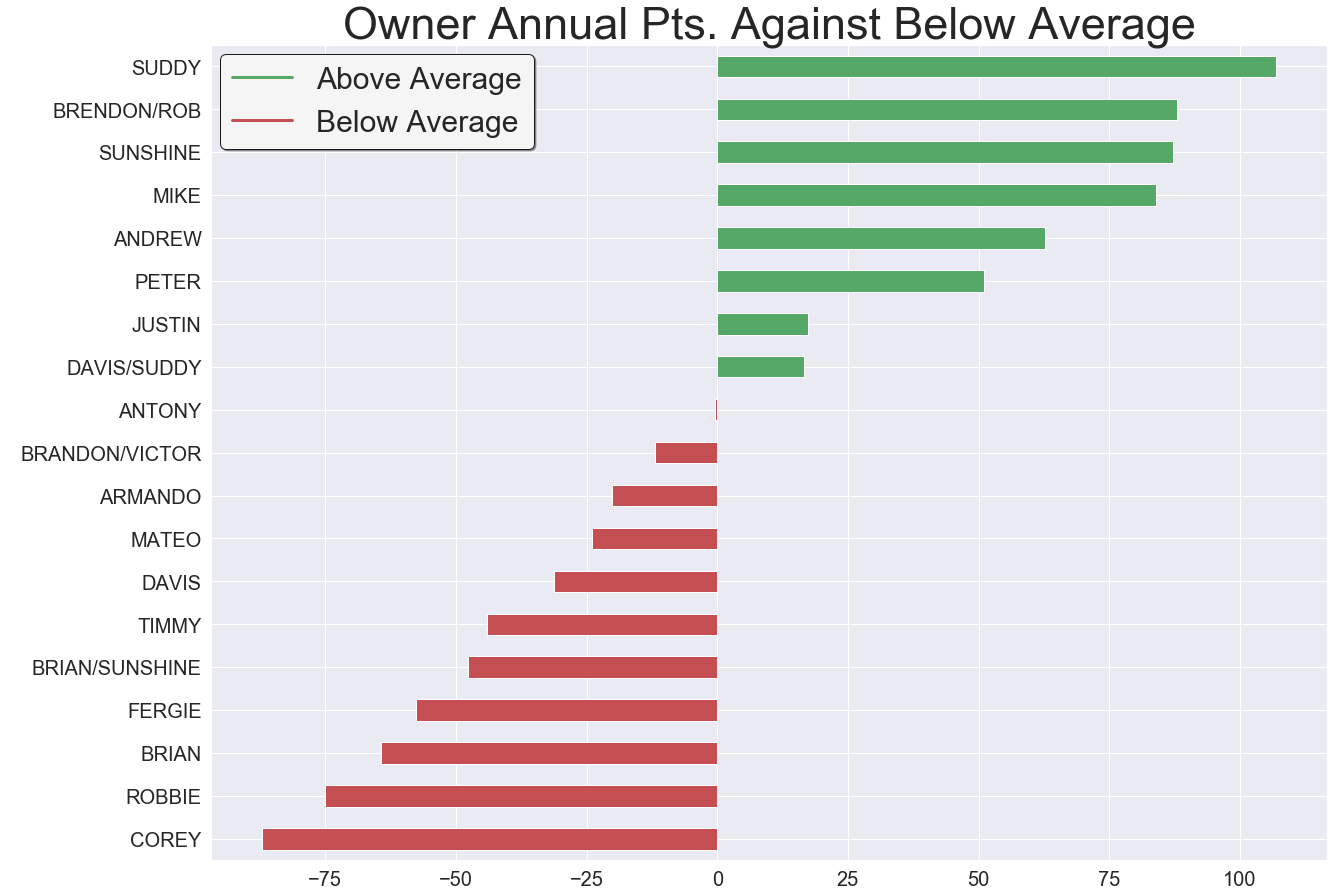

In [42]:
result = pd.DataFrame(data.groupby('MANAGER')['Pts_Against_Below_Avg'].mean()).sort_values('Pts_Against_Below_Avg')
#Plot values less than 0 as red, values greater than 0 as green
mask = (result >=0)
colors = np.array(['r']*(result.shape[0]))
colors[mask.values.flatten()] = 'g'

#Generating the bar plot
ax = result['Pts_Against_Below_Avg'].plot(kind='barh', color=colors.reshape(-1, ), figsize=(20, 15))

#Changing the ylabel and tick parameters
ax.tick_params(labelsize=20)
plt.ylabel(' ', size=10)

#Custom lines for use in the legend
custom_lines = [Line2D([0], [0], color='g', lw=3),
                Line2D([0], [0], color='r', lw=3)]

#Specifying the custom legend
ax.legend(custom_lines, ['Above Average', 'Below Average'], 
          loc=2, prop={'size':30}, fancybox=True, frameon=True,
          shadow=True, facecolor='whitesmoke', edgecolor='k',
          framealpha=1, borderaxespad=.3)

#Setting the title and saving the plot locally
ax.set_title('Owner Annual Pts. Against Below Average', size=45)
fig.savefig('Owner_Pts._For_Above_Average.png');

Corey and Robbie have been historically dealt a tough hand as measured by the points against statistic. There is some correlation in these values to other managers, as Robbie used to play me twice a year and I have scored the most league points. Suddy, Sunshine, and the infamous Rob/Cobb team are the luckiest teams on average in terms of points against.

# Historic "Points Against" Seasons (Best and Worst)

### 3 Luckiest Points_Against_Below_Avg Seasons

In [10]:
data.sort_values('Pts_Against_Below_Avg', ascending=False)[:3].drop(['DIFF', 'PA/G', 'PF/G', 'WINS', 'LOSSES', 'Year'], axis=1)

,MANAGER,Win_Pct,POINTS FOR,POINTS AGAINST,REGULAR SEASON FINISH,RESULT,Pts_For_Above_Avg,Pts_Against_Below_Avg
2,MIKE,0.923077,1520.0,1258.6,1,1st Place,62.775000,198.625000
5,ANDREW,0.692308,1473.3,1380.9,2,2nd Place,-39.275000,131.675000
4,JUSTIN,0.538462,1536.3,1361.5,5,5/6,52.283333,122.508333


Last season I was the luckiest of all time by a significant margin, with Schoka and Justin rounding out the top 3.

### 3 Unluckiest Points_Against_Below_Avg Seasons

In [11]:
data.sort_values('Pts_Against_Below_Avg')[:3].drop(['DIFF', 'PA/G', 'PF/G', 'WINS', 'LOSSES', 'Year'], axis=1)

,MANAGER,Win_Pct,POINTS FOR,POINTS AGAINST,REGULAR SEASON FINISH,RESULT,Pts_For_Above_Avg,Pts_Against_Below_Avg
7,BRIAN,0.384615,1556.2,1701.0,9,MISSED POSTSEASON,43.625,-188.425
10,COREY,0.461538,1501.3,1605.2,8,MISSED POSTSEASON,44.075,-147.975
0,TIMMY,0.615385,1659.0,1623.3,3,5/6,146.425,-110.725


Brian, Corey, and Timmy all each own one of the unluckiest seasons of all time.

### Combining Average Points Against and Average Points For

To get a look at which teams should have had the most success based on points for and points against, I combine the two into one plot. I expect this plot should correlate very strongly to Win-Loss record.

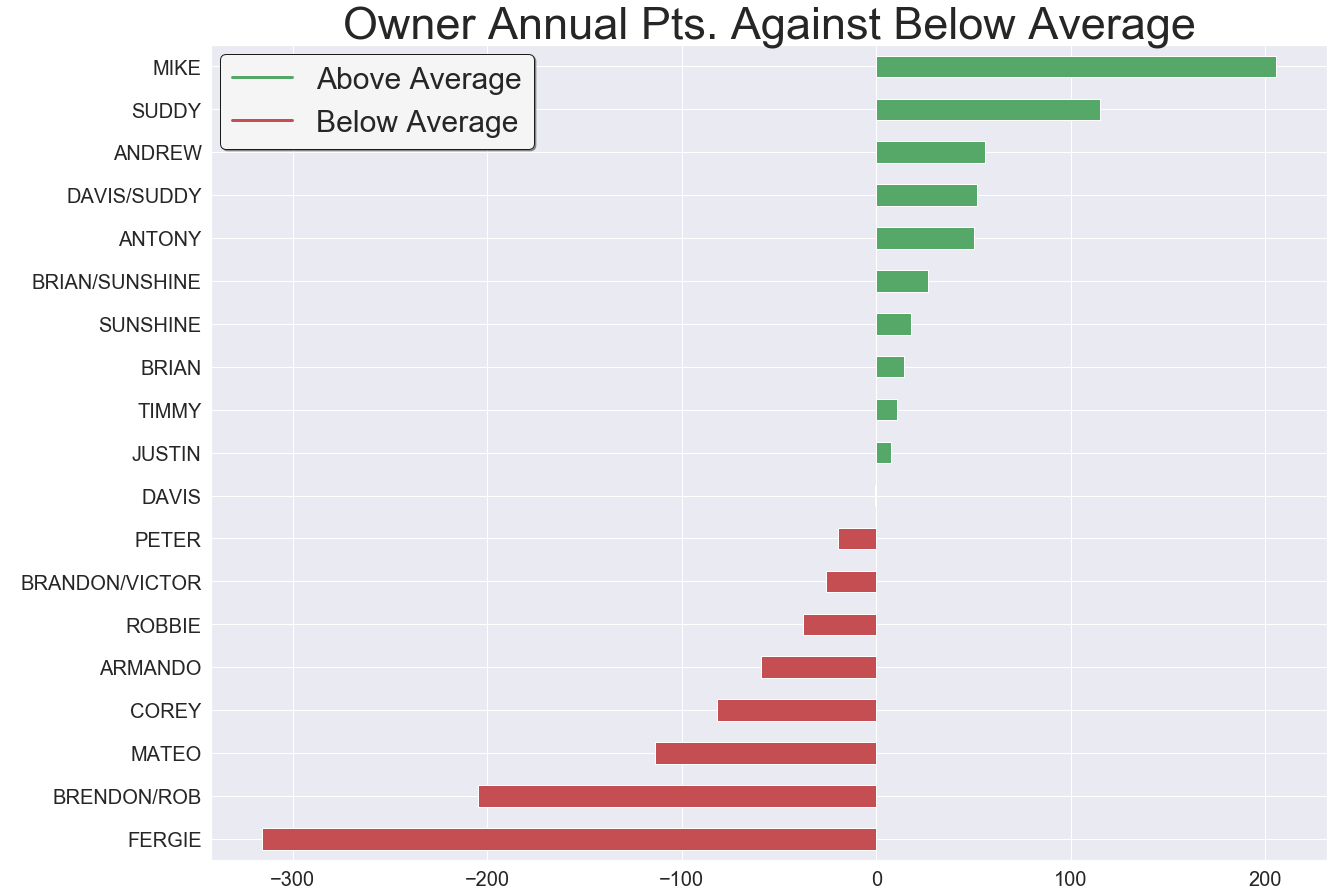

In [48]:
#Plotting
result = pd.DataFrame(data.groupby('MANAGER')['Pts_Against_Below_Avg', 'Pts_For_Above_Avg'].mean()).sum(axis=1).sort_values()

#Plot values less than 0 as red, values greater than 0 as green
mask = (result >=0)
colors = np.array(['r']*(result.shape[0]))
colors[mask.values.flatten()] = 'g'

#Generating the bar plot
ax = result.plot(kind='barh', color=colors.reshape(-1, ), figsize=(20, 15))

#Changing the ylabel and tick parameters
ax.tick_params(labelsize=20)
plt.ylabel(' ', size=10)

#Custom lines for use in the legend
custom_lines = [Line2D([0], [0], color='g', lw=3),
                Line2D([0], [0], color='r', lw=3)]

#Specifying the custom legend
ax.legend(custom_lines, ['Above Average', 'Below Average'], 
          loc=2, prop={'size':30}, fancybox=True, frameon=True,
          shadow=True, facecolor='whitesmoke', edgecolor='k',
          framealpha=1, borderaxespad=.3)

#Setting the title and saving the plot locally
ax.set_title('Owner Annual Pts. Against Below Average', size=45);

### Plotting Postseason Finish By Regular Season Finish

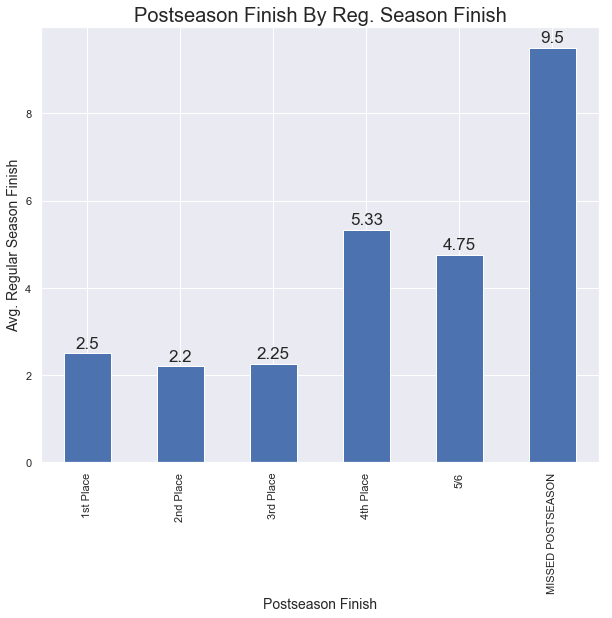

In [53]:
ax = data.groupby('RESULT')['REGULAR SEASON FINISH'].mean().plot(kind='bar', color='b', figsize=(10, 8))
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
            (p.get_x()+p.get_width()/2., p.get_height()),
            ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=17)
ax.set_title('Postseason Finish By Reg. Season Finish', fontsize=20)
ax.set_ylabel('Avg. Regular Season Finish', fontsize=14)
ax.set_xlabel('Postseason Finish', fontsize=14);

Interesting to see that the overall league winner had a higher average regular season seed than 2nd and 3rd place. 

### Total Wins

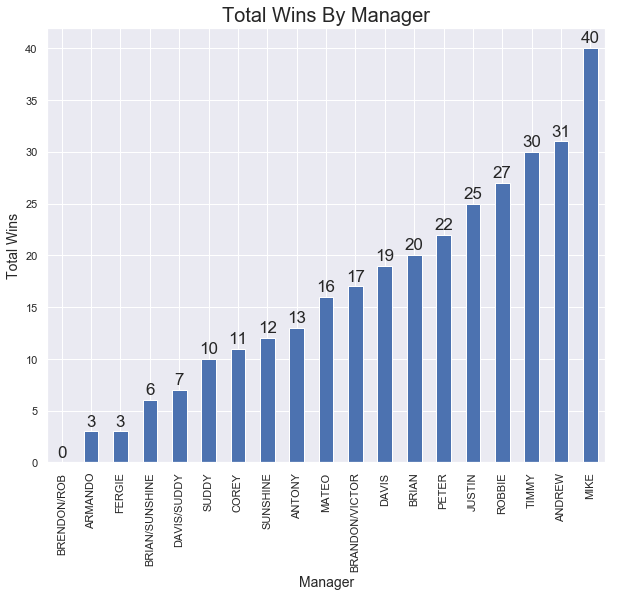

In [55]:
ax = data.groupby('MANAGER')['WINS'].sum().sort_values().plot(kind='bar', color='b', figsize=(10,8))
for p in ax.patches:
    ax.annotate((int(p.get_height())), 
            (p.get_x()+p.get_width()/2., p.get_height()),
            ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=17)
ax.set_title('Total Wins By Manager', fontsize=20)
ax.set_ylabel('Total Wins', fontsize=14)
ax.set_xlabel('Manager', fontsize=14);

### Win-Loss, Win Percentage, and Chamionship Count Table

In [66]:
#Win Loss records and average win percentage
win_loss = data.groupby('MANAGER')['WINS', 'LOSSES'].sum()
avg_win_pct = round(100*data.groupby('MANAGER')['Win_Pct'].mean().sort_values(), 2)
table = win_loss.join(avg_win_pct)

#Championship data
rings = (data[data['RESULT']=='1st Place'].groupby('MANAGER')['RESULT'].count())
table['Rings'] = rings
table['Rings'].fillna(0, inplace=True)
table['Rings'] = table['Rings'].astype(int)

#Postseason data
postseasons = (data[~data['RESULT'].isin(['MISSED POSTSEASON'])].groupby('MANAGER')['RESULT'].count())
table['Postseasons'] = postseasons
table['Postseasons'].fillna(0, inplace=True)
table['Postseasons'] = table['Postseasons'].astype(int)

#Outputting the table
table.sort_values(['Postseasons', 'Rings'], ascending=False)

,WINS,LOSSES,Win_Pct,Rings,Postseasons
MANAGER,,,,,
MIKE,40,12,76.92,2,4
TIMMY,30,22,57.69,1,4
JUSTIN,25,27,48.08,1,3
ANDREW,31,21,59.62,0,2
DAVIS,19,20,48.72,0,2
ROBBIE,27,25,51.92,0,2
ANTONY,13,13,50.00,0,1
BRANDON/VICTOR,17,22,43.59,0,1
BRIAN,20,19,51.28,0,1


### Plotting wins and loss vs. a .500 record.

Further to the right means more seasons played, and thus more games played. Green means a better record, red worse.

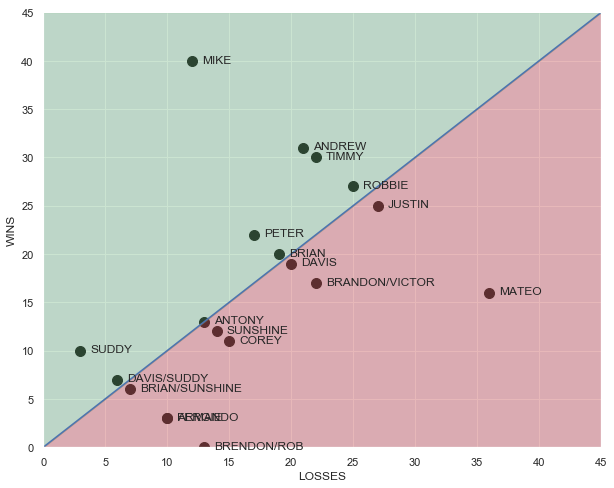

In [67]:
#Instantiating the plot
fig, ax = plt.subplots()

#Creating a scatter plot based on wins and losses
table.plot(kind='scatter', x='LOSSES', y='WINS', xlim=[0,45], ylim=[0,45], figsize=(10,8), s=100, ax=ax, color='k')

#Plotting names next to points
for k, v in table.iterrows():
    ax.annotate(k, v[['LOSSES', 'WINS']], xytext=(10, -2), textcoords='offset points')
plt.plot([0,45], [0,45])

#Filling the plot with red and green based on record
ax.fill_between(range(46), range(46), alpha=.4, color='r');
ax.fill_between(range(46), y1 = range(46), y2=45, alpha=.3, color='g');

# Pythagorean Expectation (Modified)

I will use the NFL formula for Pythagorean Expectation with a slight modificaiton. I will use manager avg. pts for as PF, and league avg. pts against as PA. *NOTE: THIS MODEL IS DOES NOT HAVE ANALYTICAL POWER, TUNING WAS VIA "Eyeballing it".

In [69]:
#Setting which members will be projected (2018-2019 participants)
owners2018 = ['ANDREW', 'BRANDON/VICTOR', 'BRIAN', 'COREY', 'DAVIS/SUDDY', \
              'JUSTIN', 'MATEO', 'MIKE', 'PETER', 'ROBBIE', 'TIMMY', 'SUNSHINE']
season_2018 = data[data['MANAGER'].isin(owners2018)]

#Creating the pythagorean dataframe
avg_pa = season_2018['POINTS AGAINST'].mean()
pf_df = pd.DataFrame(season_2018.groupby(['MANAGER'])['POINTS FOR'].mean())
pf_df['Pythagorean_Exp'] = 0

#Calculating the pythagorean win percentage
for index, row in pf_df.iterrows():
    pf = row['POINTS FOR']
    power = 15
    pf_df.loc[index, 'Pythagorean_Exp'] = (pf**power)/(pf**power + avg_pa**power)
    
#Converting win percentage to games won and lost
pf_df['Proj Wins'] = np.round(pf_df['Pythagorean_Exp'] * 13)
pf_df['Proj Losses'] = np.round((1-pf_df['Pythagorean_Exp']) * 13)    

#Outputting the table
pf_df.sort_values('Pythagorean_Exp', ascending=False)

,POINTS FOR,Pythagorean_Exp,Proj Wins,Proj Losses
MANAGER,,,,
MIKE,1616.325000,0.771124,10.0,3.0
BRIAN,1562.900000,0.670510,9.0,4.0
TIMMY,1549.100000,0.640482,8.0,5.0
ROBBIE,1531.650000,0.600495,8.0,5.0
DAVIS/SUDDY,1492.700000,0.505286,7.0,6.0
COREY,1489.850000,0.498119,6.0,7.0
ANDREW,1487.950000,0.493334,6.0,7.0
JUSTIN,1484.500000,0.484634,6.0,7.0
BRANDON/VICTOR,1484.133333,0.483708,6.0,7.0


# Calculating Average Points For by Postseason Finish

In [70]:
data.groupby('RESULT')['POINTS FOR'].agg({'mean', 'std'})

,mean,std
RESULT,,
1st Place,1582.525000,95.465923
2nd Place,1553.540000,55.449779
3rd Place,1656.200000,152.195642
4th Place,1475.733333,104.840561
5/6,1548.062500,83.815834
MISSED POSTSEASON,1425.158333,120.589353


# Correlation Between KPI's

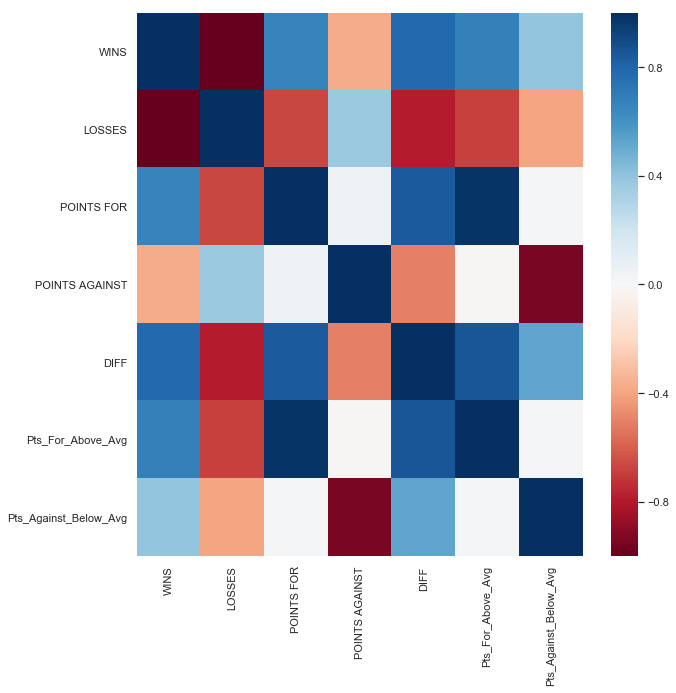

In [80]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.drop(['Win_Pct', 'REGULAR SEASON FINISH', 'PF/G', 'PA/G'], axis=1).corr(), cmap='RdBu', ax=ax);

# Number of Wins By Teams Missing the Postseason

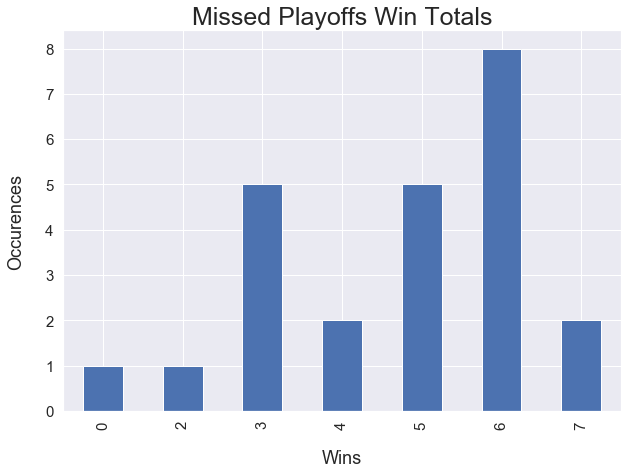

In [76]:
ax = data[data.RESULT=='MISSED POSTSEASON']['WINS'].value_counts().sort_index().plot(kind='bar', color='b',figsize=(10, 7))
plt.title('Missed Playoffs Win Totals', size=25)
plt.xlabel('Wins', size=18, labelpad=20)
plt.ylabel('Occurences', size=18,labelpad=20)
ax.tick_params(labelsize=15);